In [1]:
include("./main_parser.jl")

draw_hg (generic function with 1 method)

In [2]:
using PyCall, BSON, DecisionTree, Random, CSV

In [3]:
BSON.@load "models/model_rf.bson" rf uniques

spacy = pyimport("spacy")

nlp = spacy.load("en_core_web_trf")

PyObject <spacy.lang.en.English object at 0x7f8284c79b50>

In [4]:
text = "Dollar climbs as inflation builds case for higher rates"
doc = nlp(text)
data = convert_df([text], uniques, rf)
hg, atoms_tokens, edges = beta(patterns, doc, data[1, 2], true)

Actual hypergraph: Union{Nothing, Float64}[nothing; nothing; nothing; nothing; nothing; nothing; nothing; nothing; nothing]
Atoms tokens dict is: Dict{Int64, Tuple{Vector{String}, Vector{PyObject}}}(0 => (["C", "P", "T", "C", "P", "C", "B", "M", "C"], [PyObject Dollar, PyObject climbs, PyObject as, PyObject inflation, PyObject builds, PyObject case, PyObject for, PyObject higher, PyObject rates]))
Actual indexes: (7, 8)
Orig indexes: (7, 8)
Pattern is: (["M", "B"], "B", [2, 1])
Depth is: 5
Atoms depths are: ["C", "P", "T", "C", "P", "C", "B", "M", "C"]
Score h is: 0
aActual hypergraph: Union{Nothing, Float64}[nothing; nothing; nothing; nothing; nothing; nothing; nothing; nothing; nothing]
Atoms tokens dict is: Dict{Int64, Tuple{Vector{String}, Vector{PyObject}}}(0 => (["C", "P", "T", "C", "P", "C", "B", "M", "C"], [PyObject Dollar, PyObject climbs, PyObject as, PyObject inflation, PyObject builds, PyObject case, PyObject for, PyObject higher, PyObject rates]))
Actual indexes: (8, 9)
Or

Orig indexes: (4, 9)
Pattern is: (["P", "C", "C"], "R", [2, 1, 3])
Depth is: 2
Atoms depths are: ["C", "P", "T", "C", "P", "C"]
Score h is: 2
aActual hypergraph: Union{Nothing, Float64}[nothing nothing nothing; nothing nothing nothing; nothing nothing nothing; nothing nothing nothing; nothing nothing nothing; nothing 1.0 nothing; nothing 1.0 nothing; 1.0 1.0 nothing; 1.0 1.0 nothing]
Atoms tokens dict is: Dict{Int64, Tuple{Vector{String}, Vector{PyObject}}}(0 => (["C", "P", "T", "C", "P", "C", "B", "M", "C"], [PyObject Dollar, PyObject climbs, PyObject as, PyObject inflation, PyObject builds, PyObject case, PyObject for, PyObject higher, PyObject rates]), 2 => (["C", "P", "T", "C", "P", "C"], [PyObject Dollar, PyObject climbs, PyObject as, PyObject inflation, PyObject builds, PyObject [case, for, [higher, rates]]]), 1 => (["C", "P", "T", "C", "P", "C", "B", "C"], [PyObject Dollar, PyObject climbs, PyObject as, PyObject inflation, PyObject builds, PyObject case, PyObject for, PyObject [

(Union{Nothing, Float64}[nothing nothing … nothing 1.0; nothing nothing … nothing 1.0; … ; 1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0], Dict{Int64, Tuple{Vector{String}, Vector{PyObject}}}(0 => (["C", "P", "T", "C", "P", "C", "B", "M", "C"], [PyObject Dollar, PyObject climbs, PyObject as, PyObject inflation, PyObject builds, PyObject case, PyObject for, PyObject higher, PyObject rates]), 4 => (["C", "P", "S"], [PyObject Dollar, PyObject climbs, PyObject [as, [inflation, builds, [case, for, [higher, rates]]]]]), 5 => (["R"], [PyObject [Dollar, climbs, [as, [inflation, builds, [case, for, [higher, rates]]]]]]), 2 => (["C", "P", "T", "C", "P", "C"], [PyObject Dollar, PyObject climbs, PyObject as, PyObject inflation, PyObject builds, PyObject [case, for, [higher, rates]]]), 3 => (["C", "P", "T", "R"], [PyObject Dollar, PyObject climbs, PyObject as, PyObject [inflation, builds, [case, for, [higher, rates]]]]), 1 => (["C", "P", "T", "C", "P", "C", "B", "C"], [PyObject Dollar, PyObject climbs, PyOb

In [14]:
coalesce.(hg[:, 1], 0)

9-element Vector{Union{Nothing, Float64}}:
  nothing
  nothing
  nothing
  nothing
  nothing
  nothing
  nothing
 1.0
 1.0

In [17]:
replace(hg, nothing => 0)

9×5 Matrix{Float64}:
 0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0  1.0
 0.0  0.0  1.0  1.0  1.0
 0.0  0.0  1.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0

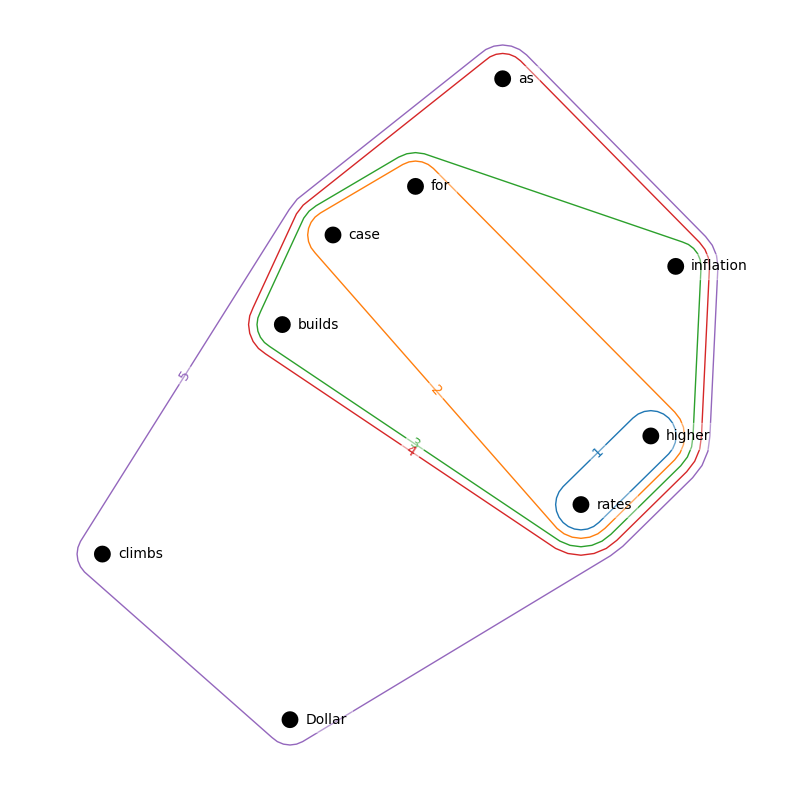

Dict(5 => "builds", 4 => "inflation", 6 => "case", 7 => "for", 2 => "climbs", 9 => "rates", 8 => "higher", 3 => "as", 1 => "Dollar")

In [18]:
draw_hg(hg, doc)

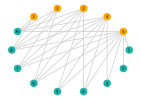

In [27]:
b = BipartiteView(hg)
using GraphPlot
using LightGraphs
nodes, hyperedges = size(hg)
nodes_membership = fill(1, nodes)
hyperedges_membership = fill(2, hyperedges)

membership = vcat(nodes_membership, hyperedges_membership)

nodecolor = ["lightseagreen", "orange"]
#membership color
nodefillc = nodecolor[membership]
gplot(b, nodefillc=nodefillc, nodelabel=vcat(1:9, 1:5), layout=circular_layout)

In [331]:
atoms_tokens[["C", "P", "S"]]

3-element Vector{PyObject}:
 PyObject Dollar
 PyObject climbs
 PyObject [as, [inflation, builds, case, [for, [higher, rates]]]]

In [332]:
doc = nlp("Dollar edges down as traders await US jobs data")
hg, tokens = beta(patterns, doc, alpha(doc, rf), true)

(Union{Nothing, Float64}[nothing nothing … nothing 1.0; nothing nothing … nothing 1.0; … ; 1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0], Dict{Vector{String}, Vector{PyObject}}(["C", "P", "M", "S"] => [PyObject Dollar, PyObject edges, PyObject down, PyObject [as, [traders, await, [US, data]]]], ["C", "P", "M", "T", "R"] => [PyObject Dollar, PyObject edges, PyObject down, PyObject as, PyObject [traders, await, [US, data]]], ["C", "P", "M", "T", "C", "P", "C", "C", "C"] => [PyObject Dollar, PyObject edges, PyObject down, PyObject as, PyObject traders, PyObject await, PyObject US, PyObject jobs, PyObject data], ["R"] => [PyObject [Dollar, edges, [down, [as, [traders, await, [US, data]]]]]], ["C", "P", "S"] => [PyObject Dollar, PyObject edges, PyObject [down, [as, [traders, await, [US, data]]]]], ["C", "P", "M", "T", "C", "P", "C"] => [PyObject Dollar, PyObject edges, PyObject down, PyObject as, PyObject traders, PyObject await, PyObject [US, data]]))

In [333]:
hg

9×5 Hypergraph{Float64, Nothing, Nothing, Dict{Int64, Float64}}:
  nothing   nothing   nothing   nothing  1.0
  nothing   nothing   nothing   nothing  1.0
  nothing   nothing   nothing  1.0       1.0
  nothing   nothing  1.0       1.0       1.0
  nothing  1.0       1.0       1.0       1.0
  nothing  1.0       1.0       1.0       1.0
 1.0       1.0       1.0       1.0       1.0
 1.0       1.0       1.0       1.0       1.0
 1.0       1.0       1.0       1.0       1.0

In [334]:
keys(tokens)

KeySet for a Dict{Vector{String}, Vector{PyObject}} with 6 entries. Keys:
  ["C", "P", "M", "S"]
  ["C", "P", "M", "T", "R"]
  ["C", "P", "M", "T", "C", "P", "C", "C", "C"]
  ["R"]
  ["C", "P", "S"]
  ["C", "P", "M", "T", "C", "P", "C"]

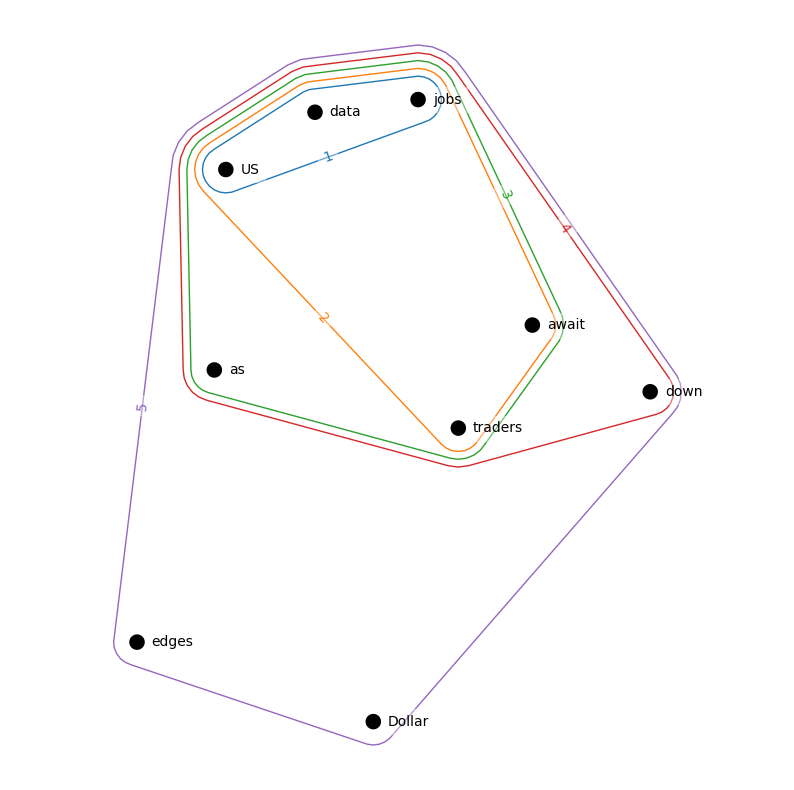

Dict(5 => "traders", 4 => "as", 6 => "await", 7 => "US", 2 => "edges", 9 => "data", 8 => "jobs", 3 => "down", 1 => "Dollar")

In [335]:
draw_hg(hg, doc)

In [336]:
doc = nlp("Dollar rebounds after improving jobs")
hg, tokens = beta(patterns, doc, alpha(doc, rf), true)

(Union{Nothing, Float64}[nothing nothing 1.0; nothing nothing 1.0; … ; 1.0 1.0 1.0; 1.0 1.0 1.0], Dict{Vector{String}, Vector{PyObject}}(["R"] => [PyObject [Dollar, rebounds, [after, [improving, jobs]]]], ["C", "P", "T", "P", "C"] => [PyObject Dollar, PyObject rebounds, PyObject after, PyObject improving, PyObject jobs], ["C", "P", "T", "R"] => [PyObject Dollar, PyObject rebounds, PyObject after, PyObject [improving, jobs]], ["C", "P", "S"] => [PyObject Dollar, PyObject rebounds, PyObject [after, [improving, jobs]]]))

In [4]:
function get_hg_tokens(text, currencies=[], predicates=[])
    doc = nlp(text)
#     hg, tokens = nothing
    try
        atoms = alpha(doc, rf)
        for (i, token) in enumerate(doc)
            if token.text == ","
                atoms[i] = "J"
            end
            if lowercase(token.text) in currencies
                atoms[i] = "C"
            end
            if lowercase(token.text) in predicates
                atoms[i] = "P"
            end
        end
        beta(patterns, doc, atoms)
    catch e
        return nothing
    end
#     return hg, tokens
end

get_hg_tokens (generic function with 3 methods)

In [2]:
BSON.@load "articles_short.bson" articles

In [3]:
articles

903-element Vector{Any}:
 "Dollar slips, euro gains as market awaits U.S. CPI data"
 "USDCHF lower but pair remains stuck in the mud"
 "Aussie rises as risk appetite rises"
 "GBPUSD working on its 3rd day higher but the going is relatively slow"
 "EURUSD remains relatively contained although higher on the day"
 "Dollar Edges Lower; Tight Range Ahead of Inflaton Data"
 "Kazakh state sells \$1.3 billion worth of foreign currency in domestic market in Jan"
 "AUD/USD nudges to two-week high as dollar slips on the day"
 "Dollar Down as Investors Await U.S. Inflation Data"
 "ForexLive Asia FX news wrap: EUR/USD slides a few points"
 "Canadian dollar weakens as oil rally loses momentum"
 "Dollar, euro trade sideways after ECB pushback"
 "Lending data from China is due soon - record new yuan loans expected"
 ⋮
 "Dollar advances as Fed minutes open door to future taper talks"
 "Dollar Steadies Near Multi-Month Lows; Fed Minutes Loom"
 "GBP/USD Hits 3-Month High but Return of Brexit Boogeyman Wi

In [4]:
articles_copy = []

Any[]

In [5]:
function clean_article(article)
    article = replace(article, "U.S." => "US")
    article = replace(article, "Forex - " => "")
    article = replace(article, "Column: " => "")
    article = replace(article, "FOREX-" => "")
#     articles = split(article, "; ")
#     output = Any[]
#     for article in articles
#         append!(output, split(article, ", "))
#     end
#     return output
    return split(article, "; ")
end

clean_article (generic function with 1 method)

In [6]:
for article in articles
    append!(articles_copy, clean_article(article))
end

In [7]:
articles_copy

1056-element Vector{Any}:
 "Dollar slips, euro gains as market awaits US CPI data"
 "USDCHF lower but pair remains stuck in the mud"
 "Aussie rises as risk appetite rises"
 "GBPUSD working on its 3rd day higher but the going is relatively slow"
 "EURUSD remains relatively contained although higher on the day"
 "Dollar Edges Lower"
 "Tight Range Ahead of Inflaton Data"
 "Kazakh state sells \$1.3 billion worth of foreign currency in domestic market in Jan"
 "AUD/USD nudges to two-week high as dollar slips on the day"
 "Dollar Down as Investors Await US Inflation Data"
 "ForexLive Asia FX news wrap: EUR/USD slides a few points"
 "Canadian dollar weakens as oil rally loses momentum"
 "Dollar, euro trade sideways after ECB pushback"
 ⋮
 "Fed Minutes Loom"
 "GBP/USD Hits 3-Month High but Return of Brexit Boogeyman Will Cap Gains"
 "Dollar slides to 2-1/2 month low as Fed rate hike fears subside"
 "Canadian exporters rejig currency hedges as commodities boom"
 "Dollar Weakens as Fed Officials

In [8]:
articles_copy = unique(articles_copy)

939-element Vector{Any}:
 "Dollar slips, euro gains as market awaits US CPI data"
 "USDCHF lower but pair remains stuck in the mud"
 "Aussie rises as risk appetite rises"
 "GBPUSD working on its 3rd day higher but the going is relatively slow"
 "EURUSD remains relatively contained although higher on the day"
 "Dollar Edges Lower"
 "Tight Range Ahead of Inflaton Data"
 "Kazakh state sells \$1.3 billion worth of foreign currency in domestic market in Jan"
 "AUD/USD nudges to two-week high as dollar slips on the day"
 "Dollar Down as Investors Await US Inflation Data"
 "ForexLive Asia FX news wrap: EUR/USD slides a few points"
 "Canadian dollar weakens as oil rally loses momentum"
 "Dollar, euro trade sideways after ECB pushback"
 ⋮
 "Dollar Steadies Near Multi-Month Lows"
 "Fed Minutes Loom"
 "GBP/USD Hits 3-Month High but Return of Brexit Boogeyman Will Cap Gains"
 "Dollar slides to 2-1/2 month low as Fed rate hike fears subside"
 "Canadian exporters rejig currency hedges as commodities

In [9]:
outfile = "articles_modified_short.txt"
open(outfile, "w") do f
  for a in articles_copy
    println(f, a)
  end
end

In [346]:
output = Dict(i => get_hg_tokens(articles_copy[i]) for i in 1:length(articles_copy))

Dict{Int64, Union{Nothing, Tuple{Hypergraph{Float64, Nothing, Nothing, Dict{Int64, Float64}}, Dict{Vector{String}, Vector{PyObject}}}}} with 1851 entries:
  1144 => (Union{Nothing, Float64}[1.0 nothing 1.0 1.0; 1.0 nothing 1.0 1.0; … ; nothing 1.0 nothing 1.0; nothing 1.0 nothing 1.0], Dict{Vector{String}, Vector{PyObject}}(["S"]=>[PyObject [[[Dollar, Ground], on], [US, Hopes]]], ["C", "T", "C"]=>[PyObject [Dollar, Ground], PyObject on, PyObject [US, Hopes]], ["S", "C"]=>[PyObject [[Dollar, Ground], on], PyObject [US, Hopes]], ["C", "T", "C", "C", "C"]=>[PyObject [Dollar, Ground], PyObject on, PyObject US, PyObject Stimulus, PyObject Hopes], ["C", "C", "C", "T", "C", "C", "C"]=>[PyObject Dollar, PyObject Gains, PyObject Ground, PyObject on, PyObject US, PyObject Stimulus, PyObject Hopes]))
  1175 => (Union{Nothing, Float64}[nothing nothing … 1.0 1.0; nothing nothing … 1.0 1.0; … ; nothing 1.0 … nothing 1.0; nothing 1.0 … nothing 1.0], Dict{Vector{String}, Vector{PyObject}}(["S"]=>[PyOb

In [347]:
results = Any[]

Any[]

In [348]:
pat = [["C", "P", "S"], ["P", "M", "S"], ["C", "P", "C"]]
for (key, value) in output
    if !(value == nothing)
#         if pat in keys(value[2])
#             push!(results, (key, value[2]))
#         end
        if any(y->y in keys(value[2]), pat)
            push!(results, (key, value[2]))
        end
    end
end

In [349]:
results

188-element Vector{Any}:
 (1028, Dict{Vector{String}, Vector{PyObject}}(["C", "P", "T", "C", "P", "M", "T", "C", "C", "C"] => [PyObject Pound, PyObject Climbs, PyObject as, PyObject Market, PyObject Pushes, PyObject Back, PyObject on, PyObject Negative, PyObject Rates, PyObject Speculation], ["C", "P", "T", "C", "P", "M", "T", "C"] => [PyObject Pound, PyObject Climbs, PyObject as, PyObject Market, PyObject Pushes, PyObject Back, PyObject on, PyObject [Negative, Speculation]], ["R"] => [PyObject [Pound, Climbs, [as, [Market, Pushes, [Back, [on, [Negative, Speculation]]]]]]], ["C", "P", "T", "R"] => [PyObject Pound, PyObject Climbs, PyObject as, PyObject [Market, Pushes, [Back, [on, [Negative, Speculation]]]]], ["C", "P", "S"] => [PyObject Pound, PyObject Climbs, PyObject [as, [Market, Pushes, [Back, [on, [Negative, Speculation]]]]]], ["C", "P", "T", "C", "P", "M", "S"] => [PyObject Pound, PyObject Climbs, PyObject as, PyObject Market, PyObject Pushes, PyObject Back, PyObject [on, [Negat

In [350]:
using DataFrames

In [351]:
currencies = ["Pound", "Dollar", "Sterling", "Euro", "dollar", "Lira", "Aussie"]

7-element Vector{String}:
 "Pound"
 "Dollar"
 "Sterling"
 "Euro"
 "dollar"
 "Lira"
 "Aussie"

In [352]:
corpus = pyimport("nltk.corpus")

PyObject <module 'nltk.corpus' from '/home/fmordarski/miniconda3/envs/sh/lib/python3.7/site-packages/nltk/corpus/__init__.py'>

In [353]:
synonyms_dict = Dict("rise" => "up", "up" => "up", "decline" => "down", 
                     "down" => "down")

Dict{String, String} with 4 entries:
  "decline" => "down"
  "rise"    => "up"
  "down"    => "down"
  "up"      => "up"

In [354]:
function get_synonyms(text)
    synonyms = []
    for ss in corpus.wordnet.synsets(text)
         push!(synonyms, ss.lemma_names()...)
    end
    return unique(synonyms)
end

get_synonyms (generic function with 1 method)

In [355]:
function get_similarity(text, vector)
    token = nlp(text)
    return maximum([token.similarity(nlp(value)) for value in vector])
end

get_similarity (generic function with 1 method)

In [356]:
function similarity_decide(text, synonyms)
    pos_sim = get_similarity("rise", synonyms)
    neg_sim = get_similarity("fall", synonyms)
    if maximum([pos_sim, neg_sim]) > 0.5
        if pos_sim > neg_sim
            return "up"
        else
            return "down"
        end
    else
        return "not sure"
    end
end

similarity_decide (generic function with 1 method)

In [357]:
function verb_direction(token, dict)
#     positive = nlp("rises")
#     negative = nlp("declines")
#     if token.similarity(positive) > token.similarity(negative)
#         return "up"
#     else
#         return "down"
#     end
    base = token.lemma_
    if base in keys(dict)
        return dict[base]
    else
        synonyms = get_synonyms(base)
        for synonym in synonyms
            if synonym in keys(dict)
                global dict[base] = dict[synonym]
                return dict[synonym]
            end
        end
        return similarity_decide(token, synonyms)
    end
end

verb_direction (generic function with 1 method)

In [358]:
function adp_direction(token)
    positive = nlp("up")
    negative = nlp("down")
    if token.similarity(positive) > token.similarity(negative)
        return "up"
    else
        return "down"
    end
end

adp_direction (generic function with 1 method)

In [359]:
df = DataFrame(Article = String[], Currency = String[], 
               Effect = String[], Reason = Any[])

,Article,Currency,Effect,Reason
,String,String,String,Any


In [360]:
for r in results
    if ["P", "M", "S"] in keys(r[2])
        edge = r[2][["P", "M", "S"]]
    elseif ["C", "P", "S"] in keys(r[2])
        edge = r[2][["C", "P", "S"]]
    else
        edge = r[2][["C", "P", "C"]]
    end
    try
        if edge[1].text in currencies
            if edge[2].pos_ == "VERB"
                pred_direct = verb_direction(edge[2], synonyms_dict)
                print(pred_direct)
                if edge[3][1].tag_ == "IN"
                    push!(df, [articles_copy[r[1]], edge[1].text, 
                          pred_direct, edge[3]])
                elseif pred_direct == "not sure"
                    push!(df, [articles_copy[r[1]], edge[1].text, 
                      adp_direction(edge[3][1]), edge[3][2]])
                else
                    push!(df, [articles_copy[r[1]], edge[1].text, 
                      pred_direct, edge[3][2]])
                end
            else
                push!(df, [articles_copy[r[1]], edge[1].text, 
                      adp_direction(edge[2]), edge[3]])
            end
        end
    catch e
        print
    end
end

upupnot suredownnot suredownupdownnot suredowndowndownnot suredownnot suredowndowndowndowndowndownupupdownupdowndowndowndowndownupdowndowndowndownnot suredownnot suredowndownupupnot sureupnot sureupdownnot suredownnot suredownupdowndownnot surenot suredowndownupdowndownupupdowndownupdownnot sureupdownupnot surenot sureupdownnot surenot sureupupupdownnot sureupdownupdowndowndownupdownupupdownupupdowndowndownnot sureupupnot suredown

In [361]:
df

,Article,Currency,Effect,Reason
,String,String,String,Any
1,Pound Climbs as Market Pushes Back on Negative Rates Speculation,Pound,up,"PyObject [as, [Market, Pushes, [Back, [on, [Negative, Speculation]]]]]"
2,Dollar Soars as Federal Reserve Hints at Early Tapering,Dollar,up,"PyObject [as, [[Federal, Reserve], Hints, [at, [Early, Tapering]]]]"
3,Dollar squashed as Fed seen softening inflation stance,Dollar,not sure,"PyObject [as, [Fed, seen, [softening, [inflation, stance]]]]"
4,Dollar Down as Hopes Grow for Rekindled US Stimulus Talks,Dollar,down,"PyObject [as, [Hopes, Grow, [for, [Rekindled, [US, Talks]]]]]"
5,Dollar Weakens After Inflation Data Calms Tapering Fears,Dollar,down,"PyObject [After, [[Inflation, Data], Calms, [Tapering, Fears]]]"
6,Dollar edges down as traders await US jobs data,Dollar,down,"[PyObject as, Any[PyObject traders, PyObject await, PyObject[PyObject US, PyObject data]]]"
7,Dollar softens after ADP,Dollar,down,"PyObject [after, ADP]"
8,Dollar steadies after falling overnight on downbeat US data,Dollar,up,"PyObject [after, [falling, [overnight, [on, [downbeat, [US, data]]]]]]"
9,Pound Falls as EU Leaders Say UK Needs to Make Concession to Reach Deal,Pound,down,"PyObject [as, [[EU, Leaders], Say, [UK, Needs, [to, [Make, [Concession, [to, Reach], Deal]]]]]]"


In [362]:
ENV["LINES"], ENV["COLUMNS"] = 80, 1000

(80, 1000)

In [363]:
for r in results
    if articles_copy[r[1]] ∉ df.Article
        println(articles_copy[r[1]])
    end
end

Covid Concerns and Potential Tax Rises Hit Sentiment
US stops short of declaring Vietnam, Switzerland, Taiwan currency manipulators
Dollar Strengthens Ahead of Inflation Data, Fed Meeting
Dollar Up, But Capped by Friday’s US Job Data
Covid Cases Rise in Asia
US Growth Profile Looks Impressive
Sterling Tops $1.41, but Further Gains Could Prompt BoE Reaction
Fed Officials Maintain Dovish Tilt
Dollar Up, Gains Against Yen and Euro Over Strengthening US Economic Recovery
Risk Appetite Hit by Trump Covid News
Covid Hits Consumer Sentiment
Second Virus Wave Prompts Caution
Federal Reserve Seen Tolerating Higher Yields
Uncertainty Climbs with Tight Election
Fed Officials Offer Mixed Signals
Fed meeting looms next week
Risk Sentiment Hit by Equity Turmoil
Dollars bought as stimulus hopes ebb
Dollar Remains Weak
Federal Reserve Leads Central Bank Week
Focus Turns to May CPI Release
Dollar Up, but Subdued by Continuing Inflation Jitters
Dollar slips and yuan soars as investors eye Biden presiden

In [364]:
data = DataFrame(CSV.File("data/articles_modified_analysis_short.csv"))

,Article,Currency move + reason
,String,String?
1,Dollar dips but shows biggest weekly gain in almost 3 months,n
2,"EURJPY Price Penetrates $131 Level Downside, Targeting $130 Level",n
3,"Far from debasement, dollar hits overdrive",n
4,Dollar Edges Lower,n
5,Remains Near 16-Month High,n
6,NZ dollar drops below 70 level,n
7,Dollar Near 16-Month High on Rates Hike Bets,y
8,Dollar climbs after hot US inflation,y
9,euro dips,n


In [365]:
rename!(data, [:Article, :Target])

,Article,Target
,String,String?
1,Dollar dips but shows biggest weekly gain in almost 3 months,n
2,"EURJPY Price Penetrates $131 Level Downside, Targeting $130 Level",n
3,"Far from debasement, dollar hits overdrive",n
4,Dollar Edges Lower,n
5,Remains Near 16-Month High,n
6,NZ dollar drops below 70 level,n
7,Dollar Near 16-Month High on Rates Hike Bets,y
8,Dollar climbs after hot US inflation,y
9,euro dips,n


In [366]:
filter!(row -> !ismissing(row.Target), data)

,Article,Target
,String,String?
1,Dollar dips but shows biggest weekly gain in almost 3 months,n
2,"EURJPY Price Penetrates $131 Level Downside, Targeting $130 Level",n
3,"Far from debasement, dollar hits overdrive",n
4,Dollar Edges Lower,n
5,Remains Near 16-Month High,n
6,NZ dollar drops below 70 level,n
7,Dollar Near 16-Month High on Rates Hike Bets,y
8,Dollar climbs after hot US inflation,y
9,euro dips,n


In [367]:
currencies = ["pound", "dollar", "sterling", "euro", "dollar", "lira", "aussie",
              "gbpusd", "gbp", "usdcad", "sterlin", "myanmar", "yuan", "zloty", "forint"]

15-element Vector{String}:
 "pound"
 "dollar"
 "sterling"
 "euro"
 "dollar"
 "lira"
 "aussie"
 "gbpusd"
 "gbp"
 "usdcad"
 "sterlin"
 "myanmar"
 "yuan"
 "zloty"
 "forint"

In [368]:
insertcols!(data, 3, :Model1 => 0, :Model2 => 0, :Model3 => 0)

,Article,Target,Model1,Model2,Model3
,String,String?,Int64,Int64,Int64
1,Dollar dips but shows biggest weekly gain in almost 3 months,n,0,0,0
2,"EURJPY Price Penetrates $131 Level Downside, Targeting $130 Level",n,0,0,0
3,"Far from debasement, dollar hits overdrive",n,0,0,0
4,Dollar Edges Lower,n,0,0,0
5,Remains Near 16-Month High,n,0,0,0
6,NZ dollar drops below 70 level,n,0,0,0
7,Dollar Near 16-Month High on Rates Hike Bets,y,0,0,0
8,Dollar climbs after hot US inflation,y,0,0,0
9,euro dips,n,0,0,0


In [369]:
function model_1(currencies_list, article)
    if any(y -> occursin(y, lowercase(article)), currencies_list)
        return 1
    else
        return 0
    end
end     

model_1 (generic function with 1 method)

In [370]:
function model_2(currencies_list, article)
    output = 0
    currencies_indexes = []
    doc = nlp(article)
    for (i, token) in enumerate(doc)
        if lowercase(token.text) in currencies_list
            append!(currencies_indexes, i)
        end
    end
    for i in currencies_indexes
        if length(doc) > i
            if doc[i+1].pos_ == "VERB"
                output = 1
            end
        end
    end
    return output
end   

model_2 (generic function with 1 method)

In [371]:
function check_curr(part, currencies_list)
    curr_check = false
    try
        for token in part
            curr_check = lowercase(token.text) in currencies_list
            if curr_check
                break
            end
        end
    catch e
    end
    try
        curr_check = lowercase(part.text) in currencies_list
    catch e
    end
    return curr_check
end 

check_curr (generic function with 1 method)

In [372]:
function conn_curr(part, invalid)
    curr_check = false
    try
        for token in part
            curr_check = !(lowercase(token.text) in invalid)
            if curr_check
                break
            end
        end
    catch e
    end
    try
        curr_check = !(lowercase(part.text) in invalid)
    catch e
    end
    return curr_check
end 

conn_curr (generic function with 1 method)

In [389]:
function model_3(article, currencies_list, predicates)
    output = 0
    out = get_hg_tokens(article, currencies_list, predicates)
#     if (!(out == nothing) & (any(y -> occursin(y, lowercase(article)), currencies_list)))
    if !(out == nothing)
#         if any(y->y in keys(out[2]), pat)
#             output = 1
#         end
#     end
#     return output
        patterns = [["C", "P", "S"], ["C", "M", "S"], ["C", "P", "C", "S"]]
        art_pat = keys(out[2])
        for pat in patterns
            for edge in art_pat
                j = length(pat)
                if length(edge) >= j
                    for i in 1:length(edge)-length(pat)+1
                        possible = edge[i:j]
                        part = out[2][edge][i:j][1]
                        curr_check = check_curr(part, currencies_list)
                        if (pat == possible) & (curr_check)
                            output = 1
                            return output
                        end
                        j += 1
                    end
                end
            end
        end
        patterns = [["C", "P", "T"], ["C", "M", "T"]]
        invalid = ["to", "for"]
        for pat in patterns
            for edge in art_pat
                j = length(pat)
                if length(edge) >= j
                    for i in 1:length(edge)-length(pat)+1
                        possible = edge[i:j]
                        part = out[2][edge][i:j]
                        curr_check = check_curr(part[1], currencies_list)
                        connector_chec = conn_curr(part[3], invalid)
                        if (pat == possible) & (curr_check) & (connector_chec)
                            output = 1
                            return output
                        end
                        j += 1
                    end
                end
            end
        end
    end
    return 0
end

model_3 (generic function with 2 methods)

In [390]:
# pat = [["P", "M", "S"], ["C", "P", "C"], ["C", "P", "S"], ["C", "M", "S"]]
predicates = ["dips", "rebounds", "firms"]
for row in eachrow(data)
    row.Model1 = model_1(currencies, row.Article)
    row.Model2 = model_2(currencies, row.Article)
    row.Model3 = model_3(row.Article, currencies, predicates)
end

In [391]:
function recall(target, model)
    p1 = filter(row -> (row[model] == 1) & (row[target] == "y"), data)
    p2 = filter(row -> row[target] == "y", data)
    return nrow(p1)/nrow(p2)
end

recall (generic function with 1 method)

In [392]:
function precision(target, model)
    p1 = filter(row -> (row[model] == 1) & (row[target] == "y"), data)
    p2 = filter(row -> (row[model] == 1) & (row[target] == "n"), data)
    return nrow(p1)/(nrow(p2) + nrow(p1))
end

precision (generic function with 1 method)

In [393]:
precision("Target", "Model1")

0.7128378378378378

In [394]:
recall("Target", "Model1")

0.9952830188679245

In [395]:
precision("Target", "Model2")

0.7731958762886598

In [396]:
recall("Target", "Model2")

0.35377358490566035

In [397]:
precision("Target", "Model3")

0.9090909090909091

In [398]:
recall("Target", "Model3")

0.5188679245283019

In [399]:
filter(row -> (row["Target"] == "y") & (row["Model3"] == 0), data)

,Article,Target,Model1,Model2,Model3
,String,String?,Int64,Int64,Int64
1,Dollar Near 16-Month High on Rates Hike Bets,y,1,0,0
2,US Dollar Continues to Gain Following Wednesday's Inflation Data,y,1,1,0
3,Aussie dips below 73 on soft jobs report,y,1,0,0
4,"Dollar Up, at One-Month Low Against Yen as Investors Await US Inflation Data",y,1,0,0
5,Pound US Dollar Exchange Rate Struggles ahead of US Inflation,y,1,0,0
6,Pound to Put Squeeze on Bears as BoE Unlikely to Sit on Rate-Hike Fence,y,1,0,0
7,Hedge funds get smoked on sterling by BoE sizzler,y,1,0,0
8,"Dollar soars to more than 1-year high after jobs data, then pulls back",y,1,1,0
9,"Dollar rebounds, sterling slumps, as market resets rate expectations",y,1,0,0


In [388]:
get_hg_tokens("Dollar Retains Strength on Rising Yields", currencies, predicates)

(Union{Nothing, Float64}[nothing nothing 1.0; nothing nothing 1.0; … ; 1.0 1.0 1.0; 1.0 1.0 1.0], Dict{Vector{String}, Vector{PyObject}}(["C", "P", "C", "T", "C", "C"] => [PyObject Dollar, PyObject Retains, PyObject Strength, PyObject on, PyObject Rising, PyObject Yields], ["C", "P", "C", "S"] => [PyObject Dollar, PyObject Retains, PyObject Strength, PyObject [on, [Rising, Yields]]], ["R"] => [PyObject [Dollar, Retains, Strength, [on, [Rising, Yields]]]], ["C", "P", "C", "T", "C"] => [PyObject Dollar, PyObject Retains, PyObject Strength, PyObject on, PyObject [Rising, Yields]]))

In [303]:
nlp = spacy.load("en_core_web_lg")

PyObject <spacy.lang.en.English object at 0x7f968eb48910>

In [249]:
doc = nlp("Dollar climbs as US inflation surge fuels rate hike speculation")

PyObject Dollar climbs as US inflation surge fuels rate hike speculation

In [ ]:
doc[7].pos_

In [ ]:
graphbrain = pyimport("graphbrain.parsers")

In [ ]:
parser = graphbrain.create_parser(lang="en")

In [ ]:
text = "Dollar climbs as inflation builds case for higher rates"

In [ ]:
parses = parser.parse(text)
for parse in parses
    println(parse)
    edge = parse["main_edge"]
    print(edge)
    print(edge.to_str())
end